In [25]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from plotly import tools
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
#loading the dataset using pandas
df = pd.read_csv("Downloads/iris/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [27]:
df.shape

(150, 6)

In [28]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [29]:
df["Species"].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

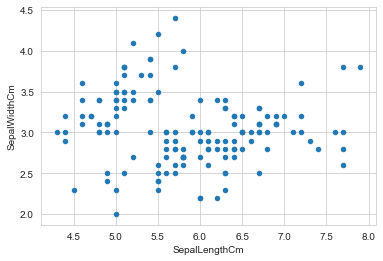

In [30]:
#2D scatterplot
df.plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm');
plt.show()

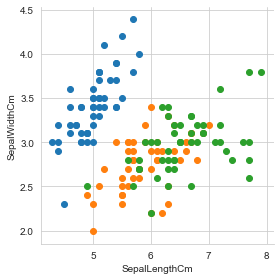

In [31]:
#2D plot
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="Species", height = 4) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm")
plt.show();

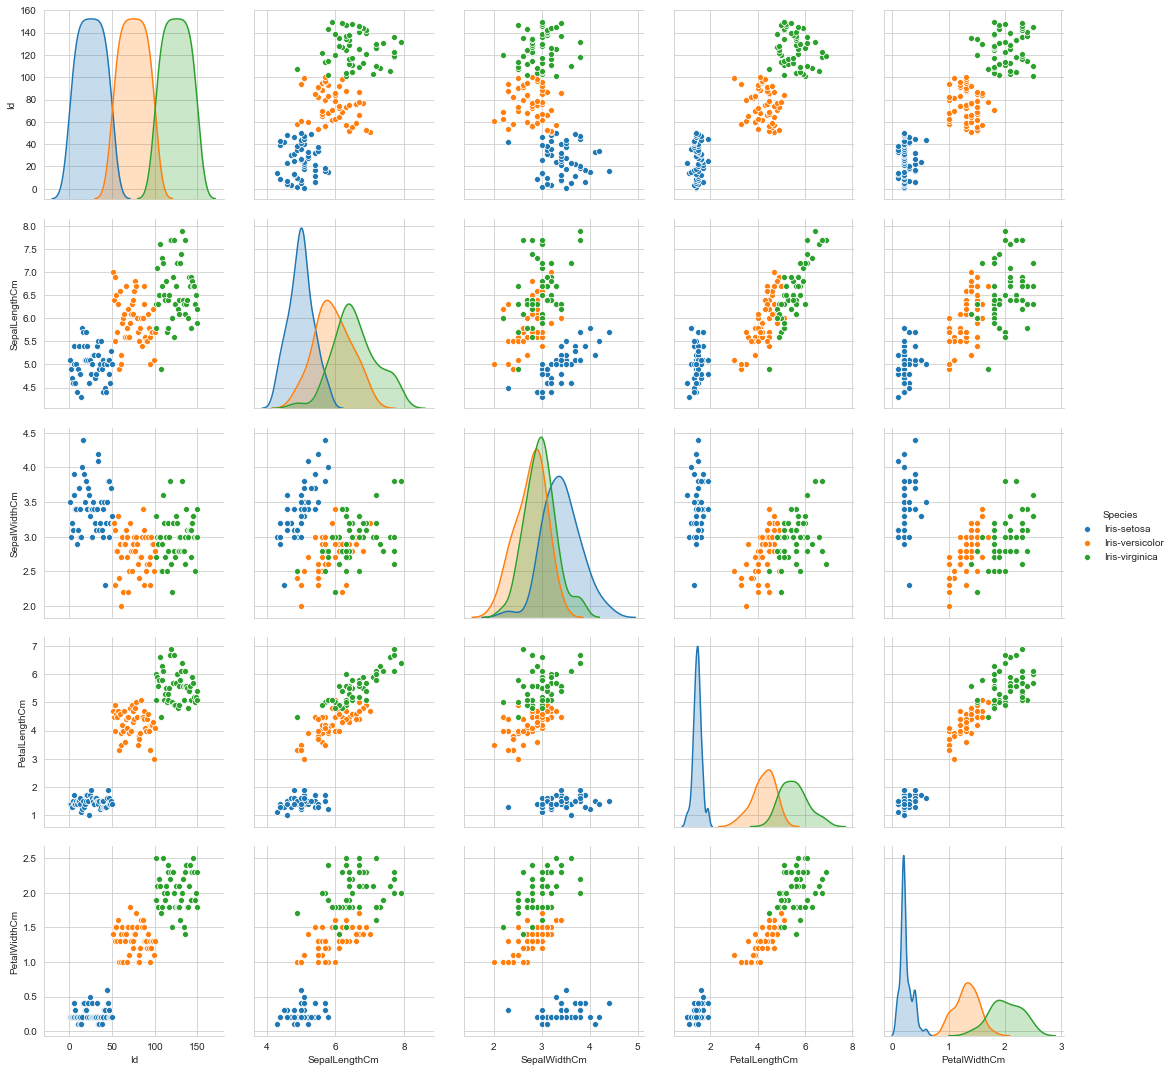

In [32]:
#pair plots
plt.close()
sns.set_style("whitegrid");
sns.pairplot(df, hue="Species", height=3);
plt.show();

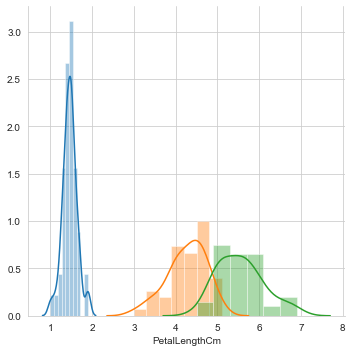

In [33]:
#histogram on petal length
sns.FacetGrid(df, hue="Species", height=5) \
   .map(sns.distplot, "PetalLengthCm")
plt.show();

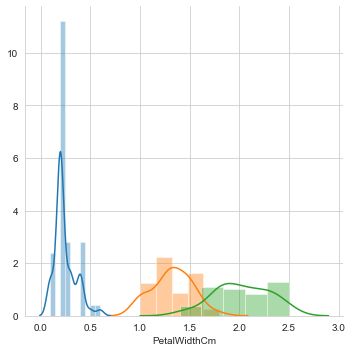

In [34]:
#histogram on petal width
sns.FacetGrid(df, hue="Species", height=5) \
   .map(sns.distplot, "PetalWidthCm")
plt.show();

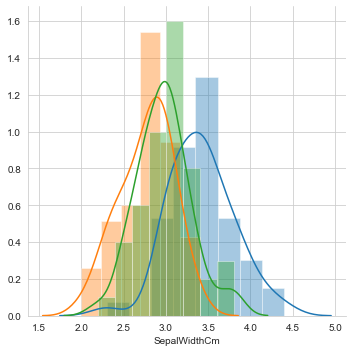

In [35]:
#histogram on sepal width
sns.FacetGrid(df, hue="Species", height=5) \
   .map(sns.distplot, "SepalWidthCm")
plt.show();

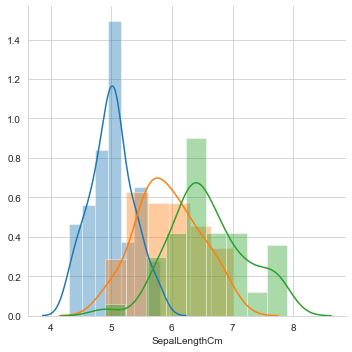

In [36]:
#histogram on sepal length
sns.FacetGrid(df, hue="Species", height=5) \
   .map(sns.distplot, "SepalLengthCm")
plt.show();

In [37]:
#slicing into three pieces
iris_setosa_df = df[:50]
iris_versicoulour_df = df[50:100]
iris_virginica_df = df[100:]

In [38]:
#Two datasets are created for training and testing¶
train_set = pd.concat([df[i:i+50].sample(40) for i in range(0, 150, 50)])
test_set = pd.concat([df, train_set]).drop_duplicates(keep=False)

In [39]:
#Labels are created for training and test datasets
train_labels, train_set = train_set[["Species"]], train_set[df.columns[:4]]
test_labels, test_set = test_set[["Species"]], test_set[df.columns[:4]]

In [40]:
#categorical data is converted to numbers
train_labels["Species"] = pd.Categorical(train_labels["Species"])
train_labels["Species"] = train_labels["Species"].cat.codes

test_labels["Species"] = pd.Categorical(test_labels["Species"])
test_labels["Species"] = test_labels["Species"].cat.codes

In [41]:
#using Linear Regression to train model
model = LinearRegression()
model.fit(train_set, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
#Result
predict = model.predict(test_set)
print('Coefficients: ', model.coef_)
# The mean squared error
print("Mean squared error: {:.2f}".format(mean_squared_error(test_labels, predict)))
# Explained variance score: 1 is perfect prediction
print('Variance score: {:.2f}'.format(r2_score(test_labels, predict)))

Coefficients:  [[ 0.01 -0.12  0.08  0.31]]
Mean squared error: 0.03
Variance score: 0.96


In [43]:
#Classification
classifier = SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(train_set, train_labels.values.ravel()).predict(test_set)

In [44]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

In [45]:
#confusion matrix
confusion_matrix(test_labels, y_pred)

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]], dtype=int64)

In [52]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
   
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [53]:
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


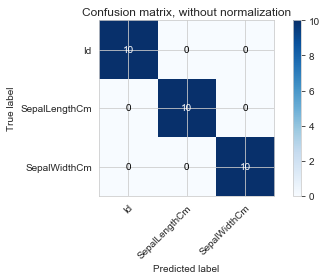

In [54]:
plot_confusion_matrix(test_labels, y_pred, classes=np.asarray(df.columns),
                      title='Confusion matrix, without normalization')

Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


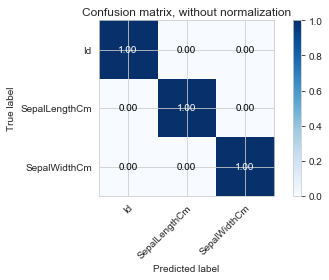

In [55]:
plot_confusion_matrix(test_labels, y_pred, classes=np.asarray(df.columns),
                      title='Confusion matrix, without normalization', normalize=True)